In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # 0 = all messages are logged (default), 1 = INFO messages are not printed, 2 = INFO and WARNING messages are not printed, 3 = INFO, WARNING, and ERROR messages are not printed
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
from tqdm import tqdm

d:\GitTest\Введение в нейронные сети\Introduction-to-HC\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 132984944248904706
 xla_global_id: -1]

In [5]:
# Функция для визуализации сгенерированных изображений
def visualize_generated_images(generator, random_dim, examples=16, figsize=(10, 10)):
    generated_images = generator.predict(generate_random_data(examples, random_dim))
    generated_images = 0.5 * generated_images + 0.5

    fig, axs = plt.subplots(figsize=figsize)
    for i in range(examples):
        axs.imshow(generated_images[i])
        axs.axis("off")
    plt.show()


# Функция для сохранения модели
def save_model(model, filename):
    model.save(filename)


# Функция для загрузки модели
def load_generator(filename):
    return load_model(filename)


# Загрузка данных Oxford-IIIT Pet
dataset, info = tfds.load("oxford_iiit_pet", split="train", with_info=True)

# Размер случайного вектора, из которого генерируются изображения
random_dim = 100


# Преобразование размера изображений
def preprocess_image(sample):
    image = sample["image"]
    image = tf.image.resize(image, (64, 64))
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    return image


# Преобразование и подготовка датасета
dataset = dataset.map(preprocess_image)

# Размеры изображений
img_size = (64, 64, 3)


# Создание генератора
def build_generator(random_dim):
    model = Sequential()
    model.add(Dense(256 * 8 * 8, input_shape=(random_dim,)))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((8, 8, 256)))
    model.add(Conv2DTranspose(128, 4, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, 4, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, 4, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(3, 5, padding="same", activation="tanh"))
    return model


# Создание дискриминатора
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, 5, strides=2, padding="same", input_shape=img_size))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(128, 5, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(256, 5, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))
    return model


# Создание GAN
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model


# Генерация случайных шумов
def generate_random_data(size, random_dim):
    return np.random.normal(0, 1, size=[size, random_dim])


# Создание и компиляция моделей
generator = build_generator(random_dim)
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

discriminator.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
gan.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

Epoch 50/10000, Discriminator Loss: 0.7917279005050659, GAN Loss: 0.5048274993896484
Epoch 100/10000, Discriminator Loss: 0.7657308578491211, GAN Loss: 0.5185105204582214
Epoch 150/10000, Discriminator Loss: 0.729270875453949, GAN Loss: 0.5355498790740967
Epoch 200/10000, Discriminator Loss: 0.7057562470436096, GAN Loss: 0.573520302772522
Epoch 250/10000, Discriminator Loss: 0.6620290875434875, GAN Loss: 0.6033672094345093
Epoch 300/10000, Discriminator Loss: 0.6288371086120605, GAN Loss: 0.6124102473258972
Epoch 350/10000, Discriminator Loss: 0.608201265335083, GAN Loss: 0.6197546720504761
Epoch 400/10000, Discriminator Loss: 0.5917484760284424, GAN Loss: 0.6304405927658081
Epoch 450/10000, Discriminator Loss: 0.5729570984840393, GAN Loss: 0.6424528360366821
Epoch 500/10000, Discriminator Loss: 0.559779167175293, GAN Loss: 0.6558226346969604
Epoch 550/10000, Discriminator Loss: 0.554022490978241, GAN Loss: 0.6717655062675476
Epoch 600/10000, Discriminator Loss: 0.568557620048523, GAN 

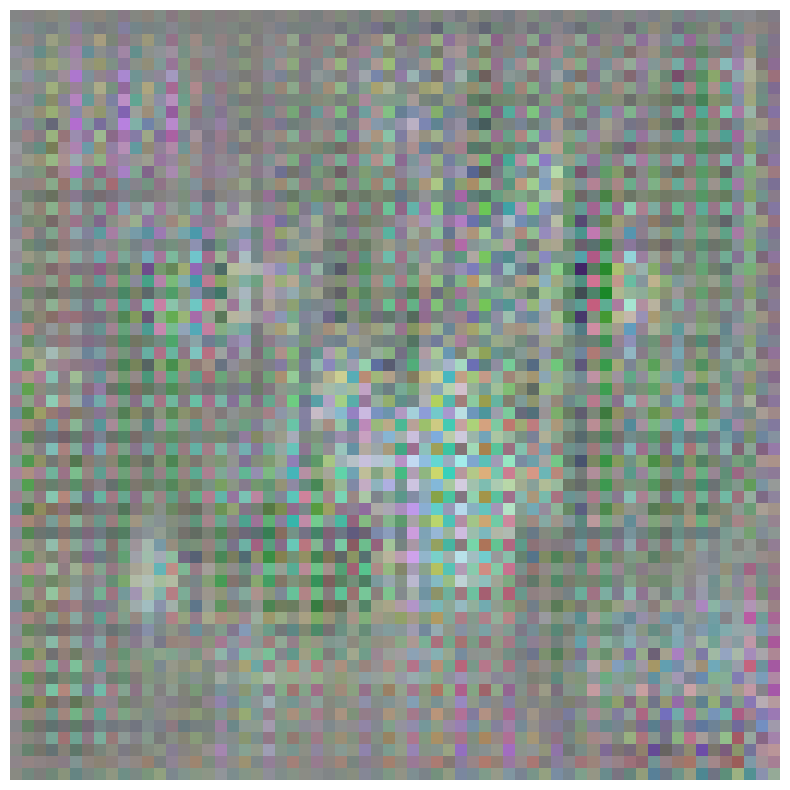

Epoch 1000/10000, Discriminator Loss: 0.6357164978981018, GAN Loss: 0.6937062740325928
Epoch 1050/10000, Discriminator Loss: 0.63407963514328, GAN Loss: 0.7153887748718262
Epoch 1100/10000, Discriminator Loss: 0.6309641599655151, GAN Loss: 0.7375040650367737
Epoch 1150/10000, Discriminator Loss: 0.627623438835144, GAN Loss: 0.7640514373779297
Epoch 1200/10000, Discriminator Loss: 0.6251809597015381, GAN Loss: 0.7880995273590088
Epoch 1250/10000, Discriminator Loss: 0.6240931153297424, GAN Loss: 0.8083397746086121
Epoch 1300/10000, Discriminator Loss: 0.6236023902893066, GAN Loss: 0.8273184895515442
Epoch 1350/10000, Discriminator Loss: 0.6231684684753418, GAN Loss: 0.8437754511833191
Epoch 1400/10000, Discriminator Loss: 0.6228650808334351, GAN Loss: 0.8596681952476501
Epoch 1450/10000, Discriminator Loss: 0.6222366094589233, GAN Loss: 0.8749321699142456


AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/gradient_tape/sequential_4_1/conv2d_7_1/convolution/Conv2DBackpropInput defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 1, message: could not create a primitive, in file tensorflow/core/kernels/mkl/mkl_conv_grad_input_ops.cc:546
	 [[{{node StatefulPartitionedCall/gradient_tape/sequential_4_1/conv2d_7_1/convolution/Conv2DBackpropInput}}]] [Op:__inference_one_step_on_iterator_481088]

In [7]:
# Обучение GAN
epochs = 10000
batch_size = 32
visualize_every = 50
visualize_every_images = 500

d_losses, g_losses = [], []

# Прогресс-бар для эпох
for epoch in range(epochs):
    # Генерация данных
    real_images = next(iter(dataset.batch(batch_size)))

    # Обучение дискриминатора
    random_data = generate_random_data(batch_size, random_dim)
    generated_images = generator(random_data, training=False)

    # Создание меток для дискриминатора
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Обучение на реальных изображениях
    discriminator_loss_real = discriminator.train_on_batch(real_images, real_labels)
    # Обучение на сгенерированных изображениях
    discriminator_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)

    # Обучение генератора
    random_data = generate_random_data(batch_size, random_dim)
    # Создание меток для генератора
    gan_labels = np.ones((batch_size, 1))
    gan_loss = gan.train_on_batch(random_data, gan_labels)

    d_losses.append(0.5 * (discriminator_loss_real + discriminator_loss_fake))
    g_losses.append(gan_loss)

    if (epoch + 1) % visualize_every_images == 0:
    # Визуализация результатов
        visualize_generated_images(generator, random_dim)

    # Выводим прогресс обучения
    if (epoch + 1) % visualize_every == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Discriminator Loss: {d_losses[-1]}, GAN Loss: {g_losses[-1]}")

In [ ]:
# Графики потерь
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="GAN Loss")
plt.legend()
plt.title("Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Сохранение модели
save_model(generator, "generator_model_pet.h5")

# Пример использования сохраненной модели
loaded_generator = load_generator("generator_model_pet.h5")
visualize_generated_images(loaded_generator, random_dim)